## Confusion Matrix
- 정확도(Accuracy) : (TN + TP) / 전체      
전체의 경우 중 맞은(T) 경우의 비율
- 정밀도(Precision) : TP / (FP + TP)      
맞다고 예측(P)한 것 중에 실제로 맞은(TP) 것의 비율
- 재현율(Recall) : TP / (FN + TP)   
실제로 참인 것(T) 중에 맞게 예측한(TP) 비율
- F1 Score : 2 / [(1/recall) + (1/precision)]   
정밀도와 재현율의 조화 평균

- 라이브러리   
  **from** sklear.metrics   
  **import** accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

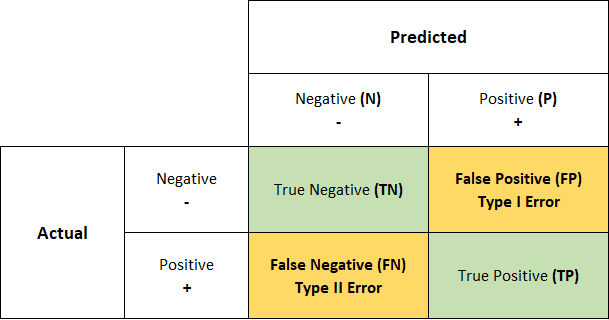

- ROC, AUC   
ROC 커브가 좌측 상단에 가까울수록 좋은 성능을 의미   
맞출 때마다 TPR(수직) 방향으로 한칸씩 올라감   
틀릴 때마다 FPR(수평) 방향으로 이동   

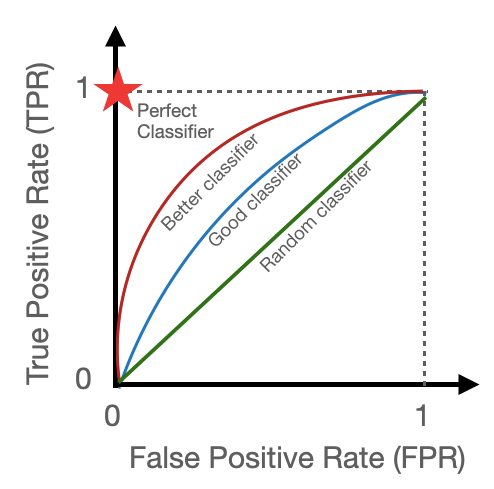

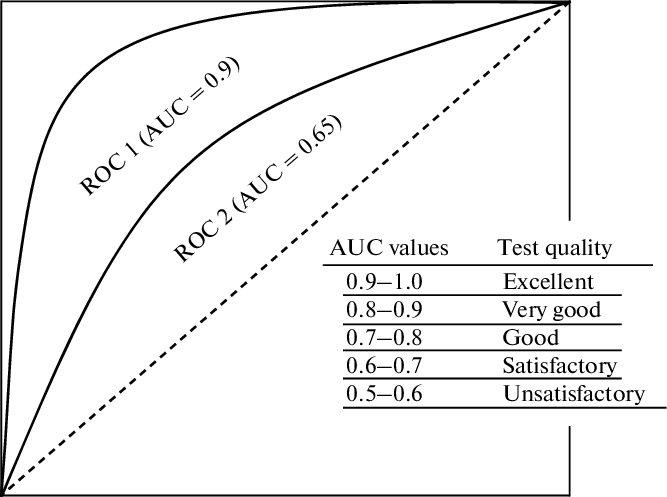

## Decision Tree
- 의사결정 규칙을 나무 구조로 나타내어 전체 자료를 몇 개의 작은 집단으로 나누어서 분석하는 기법
- SVM처럼 분류 및 회귀가 가능한 머신러닝 알고리즘
- 장점: 스케일이나 평균을 원점에 맞추는 것과 같은 데이터 전처리가 거의 필요하지 음
- Sklearn의 DecisionTree: 이진 트리(자식 노드의 수가 2개 이하)만 만드는 CART 알고리즘을 사용
- Decision Tree는 보통 max_depth로 모델의 과적합을 규제



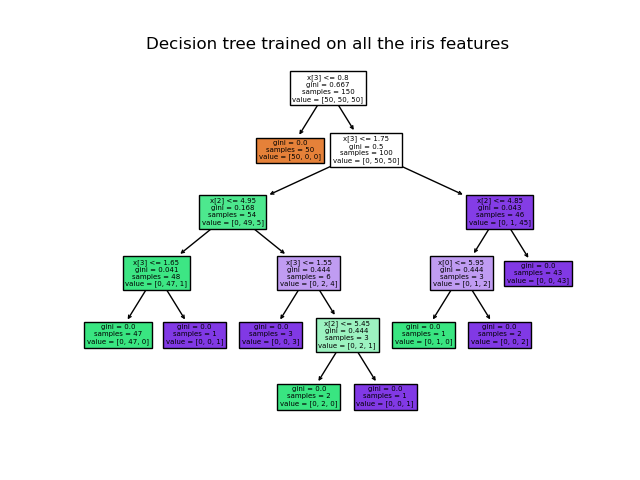

### Decision Tree의 규제 매개변수
- max_depth : 트리 최대 깊이   
  ‣ max_depth 감소 → 모델 규제 증가 →과적합 감소
- min_samples_split : 분할되기 위해 노드가 가져야 하는 최소 샘플 수    
  ‣ min_samples_split 증가 → 모델 규제 증가 → 과적합 감소
- min_samples_leaf : leaf node가 가지고 있어야할 최소 샘플 수    
  ‣ min_samples_leaf 증가 → 모델 규제 증가 → 과적합 감소
- min_weight_fraction_leaf : 가중치가 부여된 전체 샘플 수에서의 비율   
  ‣ min_weight_fraction_leaf 증가 → 모델 규제 증가 → 과적합 감소
- max_leaf_nodes : leaf node의 총 최대 개수    
  ‣ max_leaf_nodes 감소 → 모델 규제 증가 → 과적합 감소
- max_features : 최상의 분할을 찾을 때 고려할 기능의 수    
  ‣ max_features 감소 → 모델 규제 증가 → 과적합 감소

In [1]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
dfX = pd.DataFrame(iris.data, columns=iris.feature_names)
dfy = pd.DataFrame(iris.target, columns=['target'])

dfX.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)

In [3]:
print(X_train.shape, X_test.shape)
print(type(X_train), type(X_test))

X_train = X_train.values
X_test = X_test.values

print(X_train.shape, X_test.shape)
print(type(X_train), type(X_test))

(120, 4) (30, 4)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(120, 4) (30, 4)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [4]:
print(y_train.shape, y_test.shape)
print(type(y_train), type(y_test))

y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

print(y_train.shape, y_test.shape)
print(type(y_train), type(y_test))

(120, 1) (30, 1)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(120,) (30,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


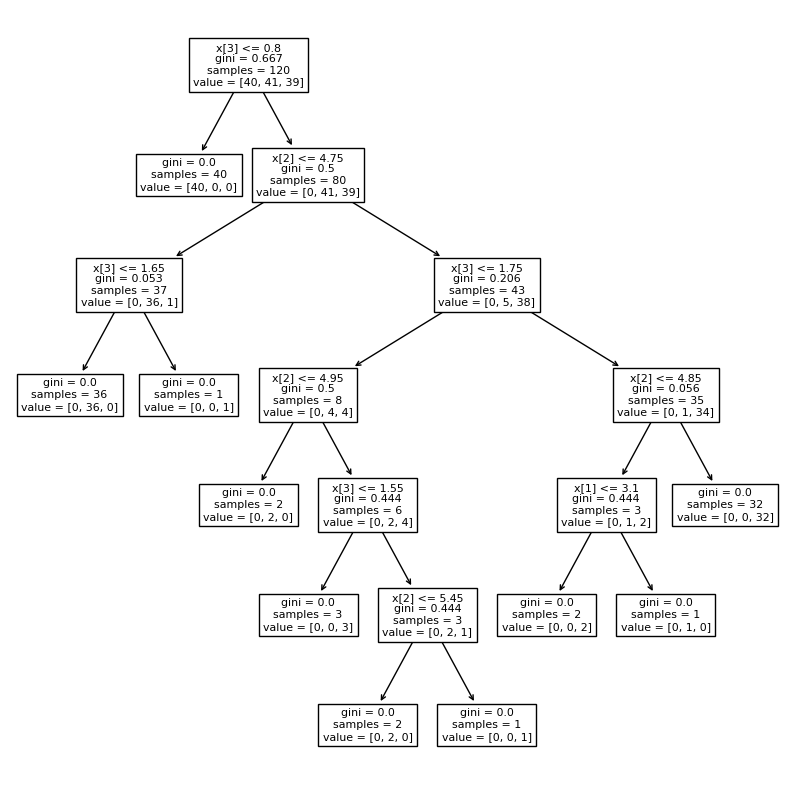

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

plt.figure(figsize=(10, 10))
plot_tree(dtc)
plt.show()

In [6]:
y_pred = dtc.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [7]:
from sklearn.metrics import *
acc = accuracy_score(y_test, y_pred)
print("정확도 :", acc)

정확도 : 1.0


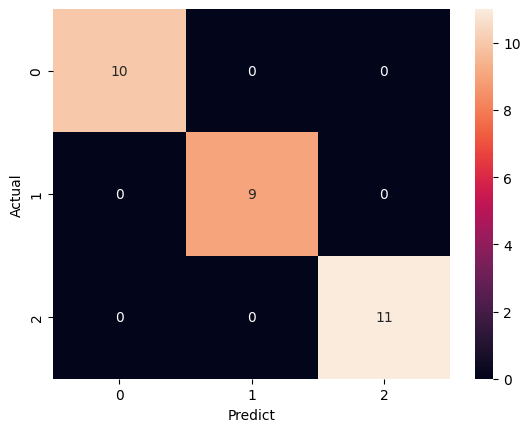

In [8]:
import seaborn as sns

cf = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cf, annot=True, fmt='d')
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

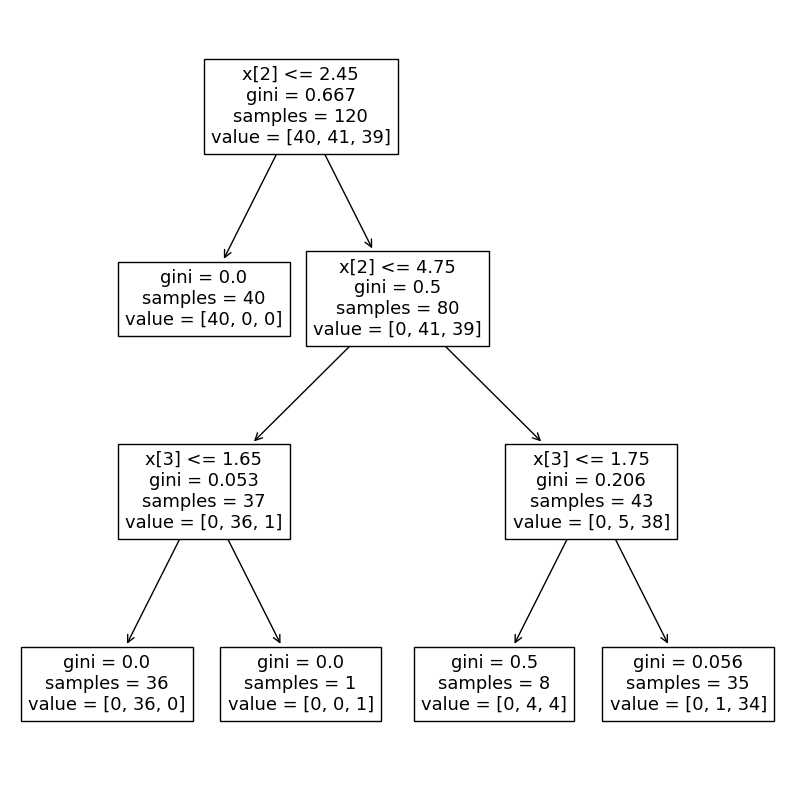

In [9]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [10]:
acc = accuracy_score(y_test, y_pred)
print("정확도 :", acc)

정확도 : 1.0


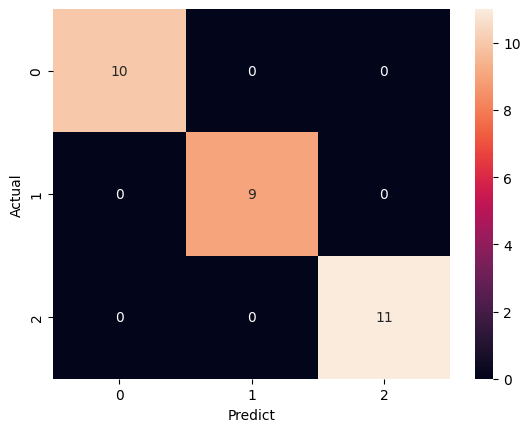

In [18]:
import seaborn as sns

cf = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cf, annot=True, fmt='d')
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()